# YOGA PROJECT USING MACHINE LEARNING IN PYTHON

# full code 

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Detected Mood: POSITIVE
Recommended Yoga Routine: Sun Salutation
Image for Warrior Pose not found.


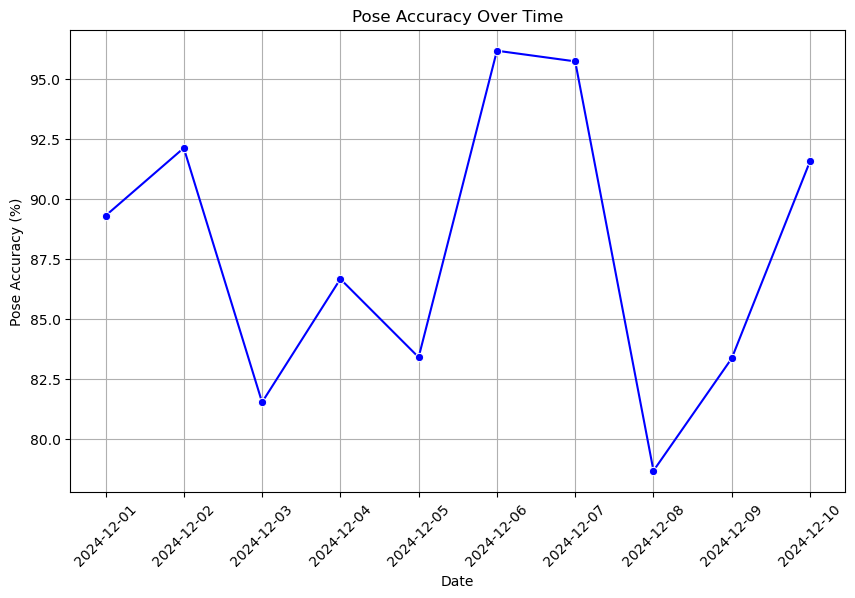

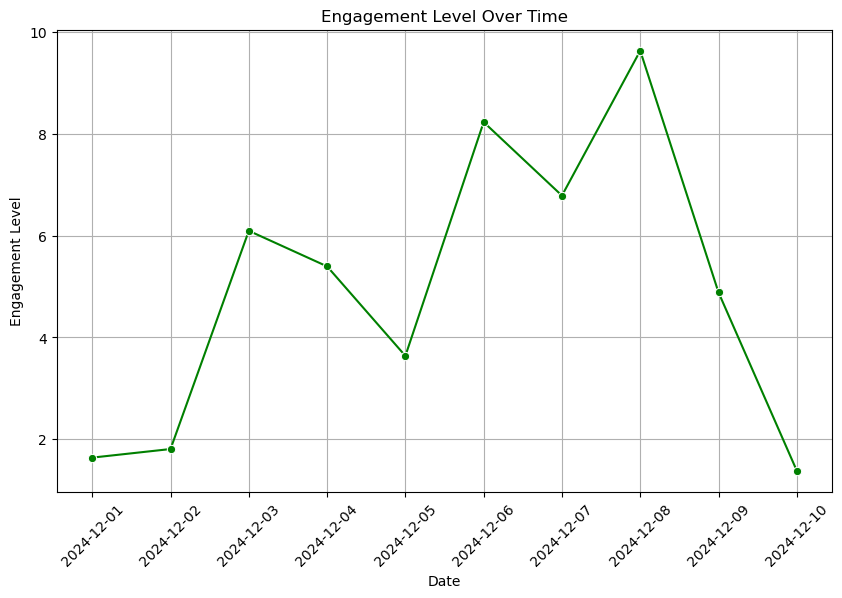

In [15]:
import cv2
import mediapipe as mp
import numpy as np
import pyaudio
import librosa
import random
import webbrowser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from datetime import datetime
from PIL import Image, ImageTk
from transformers import pipeline
import time

# Initialize Mediapipe Pose model
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Initialize sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")

# Yoga routine suggestions based on mood
yoga_routines = {
    "POSITIVE": ["Sun Salutation", "Tree Pose", "Warrior Pose"],
    "NEGATIVE": ["Child's Pose", "Cat-Cow Pose", "Breathing Exercises"],
    "NEUTRAL": ["Mountain Pose", "Seated Forward Bend", "Cobra Pose"]
}

# YouTube links based on mood
yoga_video_links = {
    "POSITIVE": "https://www.youtube.com/results?search_query=sun+salutation+yoga+video",
    "NEGATIVE": "https://www.youtube.com/results?search_query=child+pose+yoga+video",
    "NEUTRAL": "https://www.youtube.com/results?search_query=mountain+pose+yoga+video"
}

# Function to calculate angle between joints (Pose Detection)
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle

# Function to analyze sentiment and suggest a routine (Breathing Analysis)
def recommend_yoga_routine(input_text):
    sentiment_result = sentiment_pipeline(input_text)[0]
    sentiment_label = sentiment_result['label']
    
    if sentiment_label == "POSITIVE":
        mood = "POSITIVE"
    elif sentiment_label == "NEGATIVE":
        mood = "NEGATIVE"
    else:
        mood = "NEUTRAL"
    
    suggested_routine = random.choice(yoga_routines[mood])
    print(f"Detected Mood: {mood}")
    print(f"Recommended Yoga Routine: {suggested_routine}")
    
    # Open corresponding YouTube link
    webbrowser.open(yoga_video_links[mood])

# Function to track pose performance over time
def track_performance():
    # Mock data (replace with real-time tracking)
    data = {
        'date': [datetime(2024, 12, i) for i in range(1, 11)],
        'pose_accuracy': [random.uniform(75, 100) for _ in range(10)],
        'engagement_level': [random.uniform(1, 10) for _ in range(10)],
        'session_duration': [random.randint(10, 60) for _ in range(10)],
    }

    # Convert to DataFrame
    df = pd.DataFrame(data)
    avg_accuracy = df['pose_accuracy'].mean()
    avg_engagement = df['engagement_level'].mean()

    return avg_accuracy, avg_engagement, df

# Create the Tkinter GUI
def create_gui():
    window = Tk()
    window.title("Yoga Pose Detection & Analysis")
    window.geometry("1100x900")
    window.resizable(width=False,height=False)


#     # Set background image
    bg_image = Image.open(r"C:\Users\samri\Downloads\yoga.webp").resize((1100, 900))
    bg_photo = ImageTk.PhotoImage(bg_image)
    bg_label = Label(window, image=bg_photo)
    bg_label.place(relwidth=1, relheight=1)
    
    # Title Label
    title_label = Label(window, text="Yoga Pose Detection & Performance Insights", font=("Helvetica", 16),bg="blue",fg="pink")
    title_label.pack(pady=20)

    # Start button for tracking performance
    def track_button_click():
        avg_accuracy, avg_engagement, df = track_performance()
        
        accuracy_label.config(text=f"Average Pose Accuracy: {avg_accuracy:.2f}%")
        engagement_label.config(text=f"Average Engagement Level: {avg_engagement:.2f}")
        
        # Show performance graphs
        plot_performance(df)

    track_button = Button(window, text="Track Performance", command=track_button_click,bg="sky blue",fg="black")
    track_button.pack(pady=10)

    accuracy_label = Label(window, text="Average Pose Accuracy: --", font=("Helvetica", 12),bg="grey",fg="black")
    accuracy_label.pack(pady=10)
    
    engagement_label = Label(window, text="Average Engagement Level: --", font=("Helvetica", 12),bg="grey",fg="black")
    engagement_label.pack(pady=10)
    
    # Display Yoga Pose Image (Placeholder)
    def show_yoga_pose(pose_name):
        image_path = f"yoga_poses/{pose_name.lower().replace(' ', '_')}.jpg"
        try:
            img = Image.open(image_path)
            img = img.resize((300, 300))
            img = ImageTk.PhotoImage(img)
            yoga_pose_image_label.config(image=img)
            yoga_pose_image_label.image = img
        except FileNotFoundError:
            print(f"Image for {pose_name} not found.")
    
    # Display pose suggestion
    def recommend_routine_button_click():
        user_input = mood_input.get()
        recommend_yoga_routine(user_input)
        suggested_routine = random.choice(yoga_routines["POSITIVE"])  # Dummy routine
        show_yoga_pose(suggested_routine)

    routine_button = Button(window, text="Get Yoga Routine Based on Mood", command=recommend_routine_button_click,bg="sky blue",fg="black")
    routine_button.pack(pady=20)

    mood_input = Entry(window, width=50)
    mood_input.insert(0, "How are you feeling today?")
    mood_input.pack(pady=10)
    
    yoga_pose_image_label = Label(window)
    yoga_pose_image_label.pack(pady=10)

    # Camera-based Pose Detection
    cap = cv2.VideoCapture(0)
    
    def detect_pose():
        ret, frame = cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(frame)
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                landmarks = results.pose_landmarks.landmark
                left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                                 landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                              landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                              landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

                angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
                cv2.putText(frame, str(int(angle)), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

            cv2.imshow("Yoga Pose Detection", frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                cap.release()
                cv2.destroyAllWindows()
                return

        window.after(10, detect_pose)

    Button(window, text="Start Pose Detection", command=detect_pose,bg="sky blue",fg="black").pack(pady=10)

    window.protocol("WM_DELETE_WINDOW", lambda: (cap.release(), window.destroy(), cv2.destroyAllWindows()))
    window.mainloop()


# Function to plot performance data
def plot_performance(df):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=df['date'], y=df['pose_accuracy'], marker='o', color='b')
    plt.title('Pose Accuracy Over Time')
    plt.xlabel('Date')
    plt.ylabel('Pose Accuracy (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=df['date'], y=df['engagement_level'], marker='o', color='g')
    plt.title('Engagement Level Over Time')
    plt.xlabel('Date')
    plt.ylabel('Engagement Level')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Run the application
create_gui()
